In [12]:
# In the first cell of your notebook, import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# read the GDP dataset into your notebook as a DataFrame called gdp_df
gdp_df = pd.read_csv("C:/Users/ndidi/Documents/NSS_Projects/un-exploration-ndidiox/data/UNdata_Export_20230920_024356744.csv")

# inspect first 10 rows
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [61]:
# inspect last 10 rows
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [62]:
# drop Value Footnotes Column
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [64]:
# rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [7]:
# How many rows and columns does gdp_df have? 
gdp_df.shape

(7176, 3)

#### The gdp_df dataframe has 7176 rows and 3 columns.

In [8]:
# What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

#### The 'Country" column is an object data type, the 'Year' column is an integer data type, and the 'GDP_Per_Capita' column is a float data type. All are the expected data types.

In [9]:
# Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?
year = gdp_df["Year"].unique()
year

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990], dtype=int64)

Series([], dtype: int64)

#### The years 1990 - 2020 are represented in this dataframe. (come back to question 7 )

In [10]:
# How many countries are represented in this dataset? 
# Which countries are least represented in the dataset? 
# Why do you think these countries have so few observations?
countries = gdp_df["Country"].nunique()
countries

242

In [46]:
gdp_df['Country'].value_counts()

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

#### There are 242 countries represented in the dataset. The least represented countries are Somalia and Djibouti. Somali and Djibouti have so few observations likely because they are least developed and so there is a lack of resources for proper documentation.

In [11]:
# Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]
gdp_2014

,Country,Year,GDP_Per_Capita
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472
...,...,...,...
7031,Vietnam,2014,7601.858491
7062,West Bank and Gaza,2014,5967.073437
7089,World,2014,15224.439424
7120,Zambia,2014,3450.037600


In [26]:
# Use .describe() to find the summary statistics for GDP per capita in 2014.
gdp_2014[['GDP_Per_Capita']].describe()

,GDP_Per_Capita
count,242.000000
mean,19612.875611
std,20961.714572
min,822.611195
25%,4702.212961
50%,12178.874687
75%,26461.384188
max,155201.740571


<Axes: >

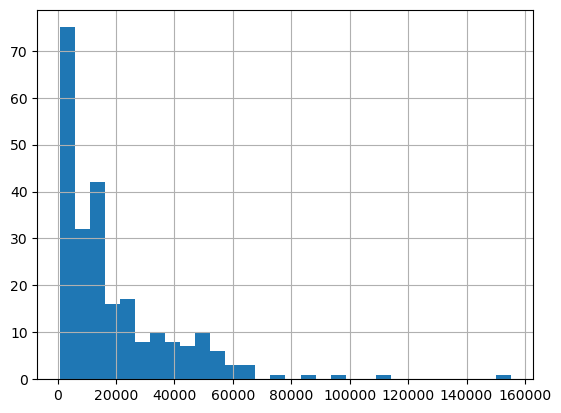

In [57]:
# Create a histogram of GDP Per Capita numbers for 2014. How would you describe the shape of the distribution?
gdp_2014['GDP_Per_Capita'].hist(bins = 30)

#### The histogram's distribution is right-skewed.

In [68]:
# Find the top 5 countries and bottom 5 countries by GDP per capita in 2018.
gdp_2018 = gdp_df[gdp_df["Year"] == 2018]
gdp_2018

,Country,Year,GDP_Per_Capita
2,Afghanistan,2018,2033.804389
21,Africa Eastern and Southern,2018,3697.317275
52,Africa Western and Central,2018,4132.592996
83,Albania,2018,13317.092313
114,Algeria,2018,11630.679409
...,...,...,...
7027,Vietnam,2018,9548.700016
7058,West Bank and Gaza,2018,6318.210068
7085,World,2018,16679.316815
7116,Zambia,2018,3521.545978


In [69]:
gdp_2018.sort_values(by='GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3915,"Macao SAR, China",2018,132373.544079
3884,Luxembourg,2018,115049.926079
5722,Singapore,2018,98336.956494
5383,Qatar,2018,90970.060902
3073,Ireland,2018,83726.362961
...,...,...,...
4752,Niger,2018,1200.402348
5873,Somalia,2018,1129.531464
1526,Dem. Rep. Congo,2018,1085.893688
1138,Central African Republic,2018,933.109951


#### The top 5 countries by GDP Per Capita in 2018 are Macao SAR, China, Luxembourg, Singapore, Qatar and Ireland. The bottom 5 countries by GDP Per Capita in 2018 are Niger, Somalia, Democratic Republic of Congo, Central African Republic and Burundi.

In [ ]:
# Now, return to the full dataset, gdp_df.
# Pivot the data for 1990 and 2018 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. 
# Drop any rows that are missing values for either 1990 or 2018. 
# Save the result to a dataframe named gdp_pivoted.

